<h1 align='center'><font color='MidnightBlue'>Bike Sharing Demand Prediction Using Linear Regression Model</font></h1>

# <font color='Chocolate'>1. Problem Statement</font>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Data Preparation

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


### Model Evaluation
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

1. **from sklearn.metrics import r2_score**<br>
2. **r2_score(y_test, y_pred)**
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

### Importing Necessary Libraries

In [1]:
# Ignore warning message
import warnings
warnings.filterwarnings("ignore")

# Importing Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# <font color='Chocolate'>2. Reading the dataset - Bike Sharing</font>

In [2]:
bikesharing_data = pd.read_csv('day.csv')

In [3]:
# Inspect bike sharing dataset
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# <font color='Chocolate'>3. Inspecting Bike Sharing Dataset and its Data Types</font>

In [4]:
# Bike Sharing dataset
bikesharing_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check dataframes shape
print(bikesharing_data.shape)

(730, 16)


In [6]:
# Description of Numerical variables
bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observation:
From Bike Sharing dataset, we have total of 730 rows and 16 columns out of which we have:

- 4 columns with Float datatype
- 11 columns with Int datatype
- 1 columns with Object datatype

# <font color='Chocolate'>4. Data Cleaning</font>

Steps involved to clean data are:
- **Removing unwanted columns/variables**
- **Handling Missing Data**
- **Check Duplicates**
- **Handling Outliers**

## <font color='Chocolate'>4.1 Removing unwanted columns/variables</font>

We can drop the following columns/variables:
- **instant:** This just represents unique row id. No use for our analysis, hence we can drop it.
- **dteday:** We already have year and mnt columns available in the dataset. Also we have day of the week attribute in the dataset. Hence we can drop this dteday column
- **casual and registered:** We have cnt variable as a targetwhich represents the combined total count of casual and registered users. We need only total count for our analysis and prediction. So, it doesn't make any sense to have each type of categories count in our dataset. Hence we can drop these columns.

In [7]:
unwanted_vars = ['instant','dteday','casual','registered']
bikesharing_data.drop(labels=unwanted_vars, axis=1, inplace=True)

In [8]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Observation:
We have dropped 'instant','dteday','casual' and 'registered' variables from the dataset. Now we have only important variables in the dataset.

## <font color='Chocolate'>4.2 Handling Missing Data</font>

Check the columns having missing data or NULL values in the dataset. Although we don't see any NULl values from the above inspection it is better to cross verify in depth.

In [9]:
# Defining a function to check the columns having NULL values
def columns_missing_data(dataset):
    result = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending=False)
    return result

In [10]:
missing_bikesharing_data = columns_missing_data(bikesharing_data)
print(missing_bikesharing_data)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64


### Observation:
There are no NULL values present in bike sharing dataset.

## <font color='Chocolate'>4.3 Check Duplicates</font>

In [11]:
print('Before checking duplicates')
print(f"Bike Share dataset shape: {bikesharing_data.shape}")

Before checking duplicates
Bike Share dataset shape: (730, 12)


In [12]:
bikesharing_data.drop_duplicates(inplace=True)

In [13]:
print('After checking duplicates')
print(f"Bike Share dataset shape: {bikesharing_data.shape}")

After checking duplicates
Bike Share dataset shape: (730, 12)


### Observation:
Bike Share dataset shape remains same before and after checking duplicates. Hence no duplicates present

## <font color='Chocolate'>4.4 Handling Outliers</font>

In [14]:
# Inspect no. of unique values in each column
bikesharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

We have four independent continous numeric variables
- **temp**
- **atemp**
- **hum**
- **windspeed**

In [15]:
numeric_vars = ['temp','atemp','hum','windspeed']

In [16]:
# Define a function to plot boxplot for identifying outliers of continuous variables
def boxplot_outlier(df, labels):
    plt.figure(figsize=(15,10))
    i, j = len(labels) // 2 + 1, 2
    for index, column in enumerate(labels):
        plt.subplot(i, j, index+1)
        sns.boxplot(df[column])
    plt.show()

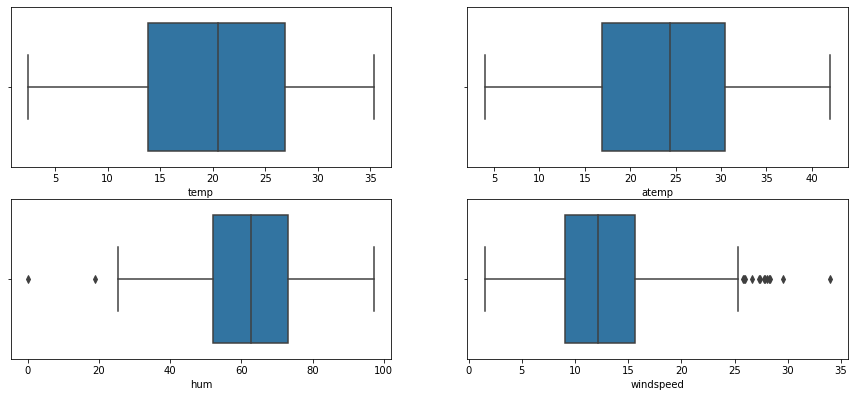

In [17]:
boxplot_outlier(bikesharing_data, numeric_vars)

### Observation:
- We don't have outliers for temp and atemp variables.
- We have very less outliers for hum and windspeed variables and won't affect our analysis much. So we can keep it as it is.

# <font color='Chocolate'>5. Data Transformation</font>

Let us convert the following variables to categorical type:
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **mnth** : month ( 1 to 12 as January to December)
- **weathersit** : {1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain}
- **weekday** : Converting 0 to 6 as Sunday to Saturday.

In [18]:
season_dict = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
month_dict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
             7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
weathersit_dict = {1:'Clear',2:'Mist',3:'Light_Rain',4:'Heavy_Rain'}
weekday_dict = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

In [19]:
bikesharing_data['season'].replace(season_dict,inplace=True)
bikesharing_data['mnth'].replace(month_dict,inplace=True)
bikesharing_data['weathersit'].replace(weathersit_dict,inplace=True)
bikesharing_data['weekday'].replace(weekday_dict,inplace=True)

In [20]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Convert to category datatype
bikesharing_data['season'] = bikesharing_data['season'].astype('category')
bikesharing_data['mnth'] = bikesharing_data['mnth'].astype('category')
bikesharing_data['weathersit'] = bikesharing_data['weathersit'].astype('category')
bikesharing_data['weekday'] = bikesharing_data['weekday'].astype('category')

In [22]:
bikesharing_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


**Categorical variables are handled properly and labelled with meaningful values.**

# <font color='Chocolate'>6. Data Visualization</font>

## <font color='Chocolate'>6.1 Analyze each Categorical Variable with respect to Target Variable</font>

## Analyze Average Ride Count accross Seasons

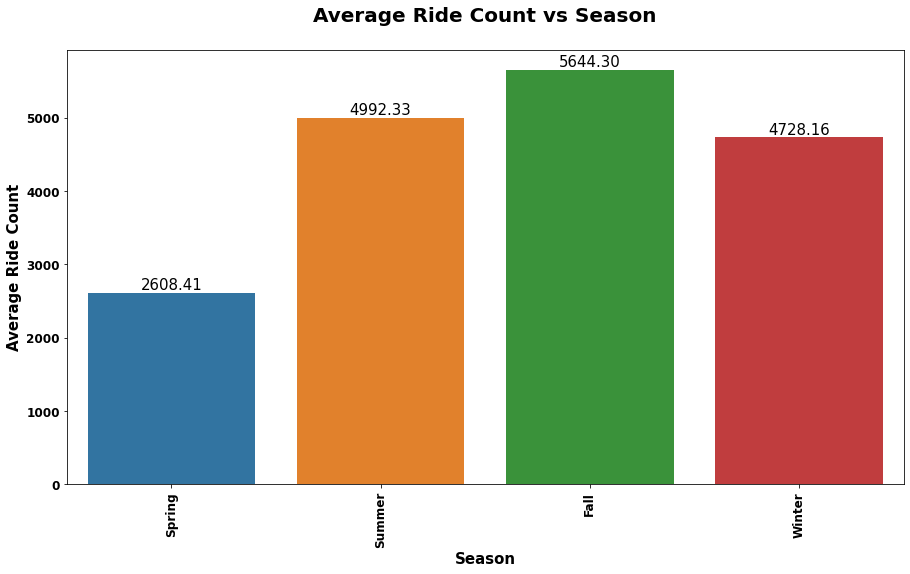

In [23]:
plt.figure(figsize=(15,8))

season_order = [season_dict[key] for key in season_dict.keys()]
plots = sns.barplot(x='season',y='cnt',data=bikesharing_data,order=season_order,ci=0)

#Title
plt.title('Average Ride Count vs Season\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Season', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Average Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Iterrating over the bars one-by-one
for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Observation:
- Highest average ride count under Fall season followed by Summer and Winter seasons.
- Spring season has the least average ride count.

## Analyze Average Ride Count accross Months

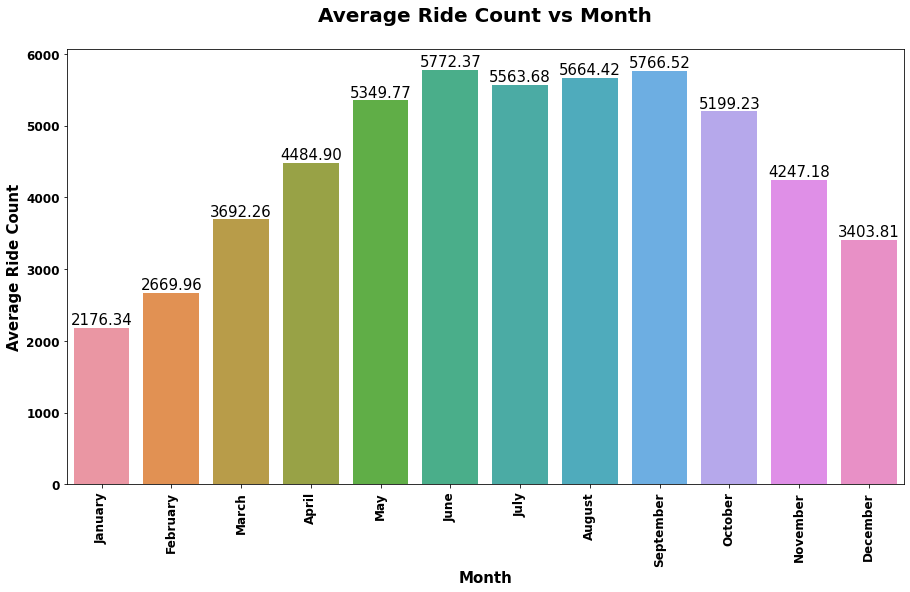

In [24]:
plt.figure(figsize=(15,8))

months_order = [month_dict[key] for key in month_dict.keys()]
plots = sns.barplot(x='mnth',y='cnt',data=bikesharing_data,order=months_order,ci=0)

#Title
plt.title('Average Ride Count vs Month\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Month', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Average Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Iterrating over the bars one-by-one
for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Observation:
- There is a sudden increase in average count after April and maintaining consistently from May to October and then falls down in November.
- We have less average ride count for January and February months compared with other months.

## Analyze Average Ride Count accross Weathers

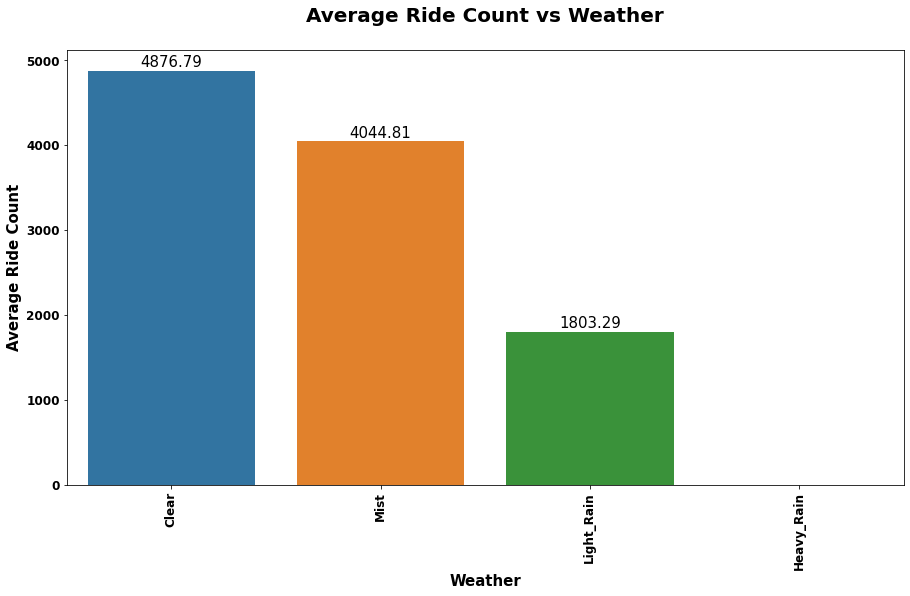

In [25]:
plt.figure(figsize=(15,8))

weather_order = [weathersit_dict[key] for key in weathersit_dict.keys()]
plots = sns.barplot(x='weathersit',y='cnt',data=bikesharing_data,order=weather_order,ci=0)

#Title
plt.title('Average Ride Count vs Weather\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Weather', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Average Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Iterrating over the bars one-by-one
for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Observation:
- We have very good average ride count in Clear and Mist weathers and there is a huge dip in light rainy weather.
- There are no ride counts present in heavy rain weather which makes sense.

## Analyze Average Ride Count with Weekdays

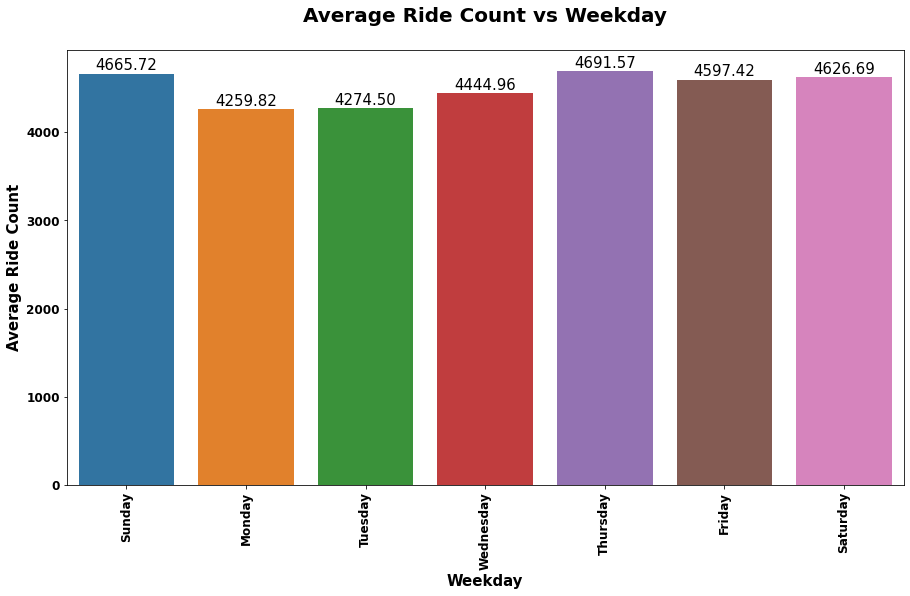

In [26]:
plt.figure(figsize=(15,8))

weekday_order = [weekday_dict[key] for key in weekday_dict.keys()]
plots = sns.barplot(x='weekday',y='cnt',data=bikesharing_data,order=weekday_order,ci=0)

#Title
plt.title('Average Ride Count vs Weekday\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Weekday', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Average Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Iterrating over the bars one-by-one
for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Observation:
- Here we can see that average ride count is higher in weekends(Saturday and Sunday) and also on Thursday and Friday. 
- We have less ride count on Monday, Tuesday and Wednesday compared with other days but still not much significant difference.
- We can safely say that people prefer renting on weekends.

## <font color='Chocolate'>6.2 Analyze each Numerical Variable (continuous) with respect to Target Variable</font>

## Relationship between Ride Count and Temperature

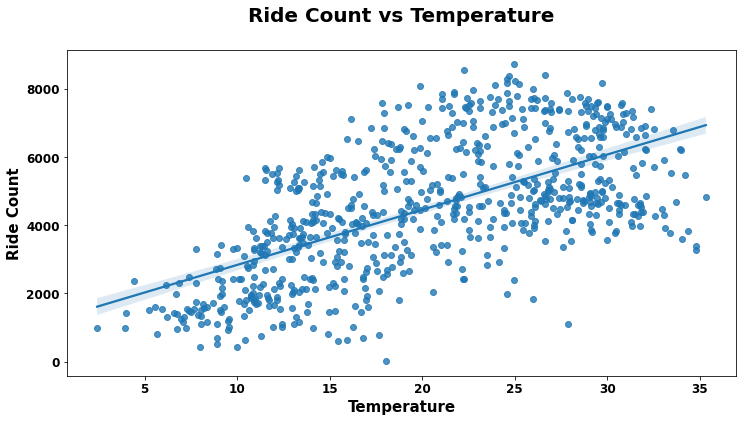

In [27]:
plt.figure(figsize=(12,6))

sns.regplot(x='temp',y='cnt',data=bikesharing_data)
#Title
plt.title('Ride Count vs Temperature\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Temperature', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- There is a positive linear relationship between temperature and bikes demand (ride count).
- As the temperature increases, ride count also increases. This was evident when we did categorical variable analysis with target variable **(Ride Count vs Months and Ride Count vs Weather)**.

## Relationship between Ride Count and Feeling Temperature

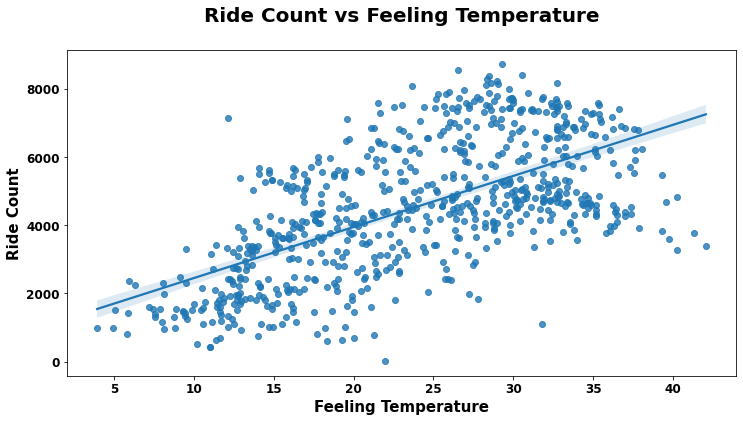

In [28]:
plt.figure(figsize=(12,6))

sns.regplot(x='atemp',y='cnt',data=bikesharing_data)
#Title
plt.title('Ride Count vs Feeling Temperature\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Feeling Temperature', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- There is a positive linear relationship between feeling temperature and bikes demand (ride count).
- As the feeling temperature increases, ride count also increases.
- This relationship is similar to the one with temperature variable. We will check the correlation between these two variables sometime later and see whether these two are correlated to each other or not.

## Relationship between Ride Count and Humidity

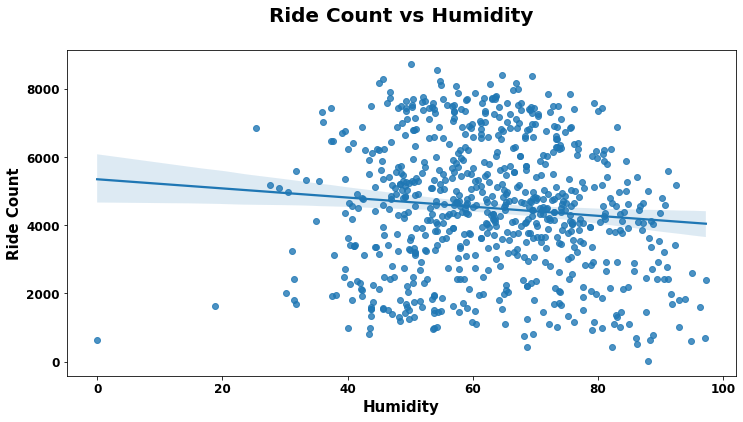

In [29]:
plt.figure(figsize=(12,6))

sns.regplot(x='hum',y='cnt',data=bikesharing_data)
#Title
plt.title('Ride Count vs Humidity\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Humidity', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- Here it seems like there is a weak linear relationship between bike demand and humidity.
- Although it shows that there is a slight decrease in ride count with an increase in humidity but can't identify much patterns in it.

## Relationship between Ride Count and Windspeed

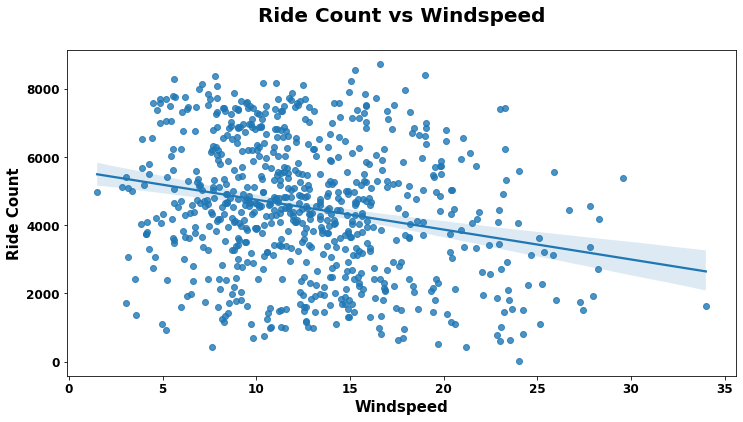

In [30]:
plt.figure(figsize=(12,6))

sns.regplot(x='windspeed',y='cnt',data=bikesharing_data)
#Title
plt.title('Ride Count vs Windspeed\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Windspeed', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Ride Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- Here the demand of bike share (ride count) decreases as the increase in windspeed. Hence there is a negative linear relationship between ride count and windspeed.
- This again makes sense with temperature variable (as the temperature increases, windspeed decreases).

## <font color='Chocolate'>6.3 Correlation between Numerical Variables</font>

## Draw Pairplot to visualize the Linear Relationship

In [31]:
numerical_variables = ['temp','atemp','hum','windspeed','cnt']

<Figure size 1080x720 with 0 Axes>

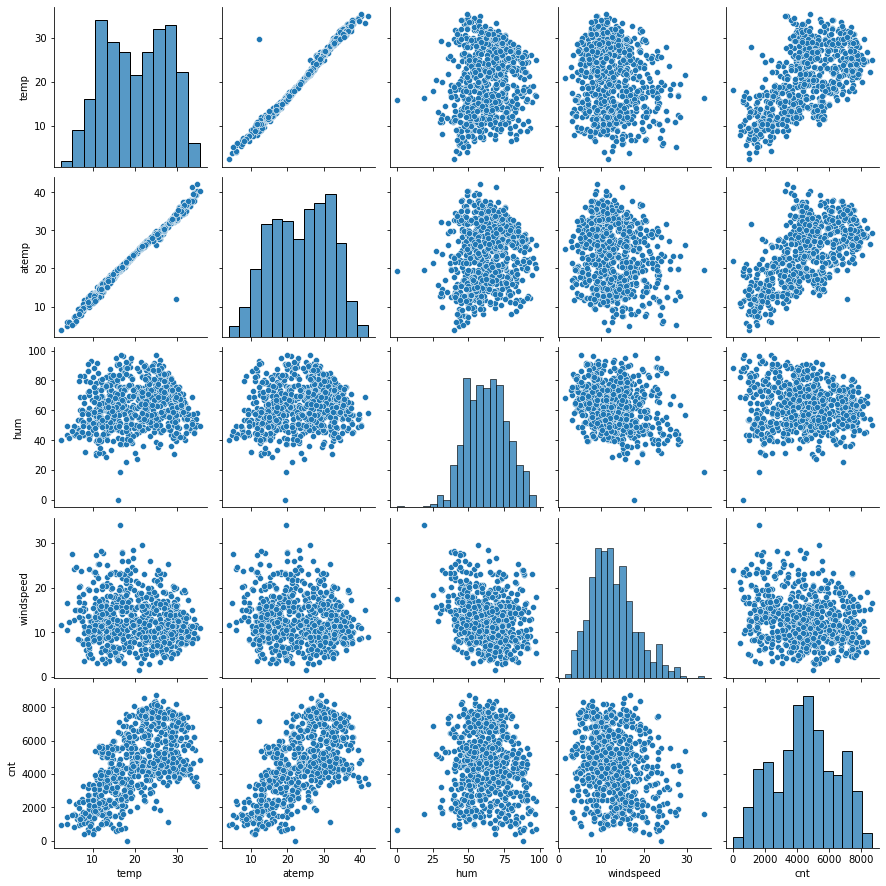

In [32]:
plt.figure(figsize=(15,10))

sns.pairplot(bikesharing_data[numerical_variables])

plt.show()

### Observation:
- Here we can see that temp and atemp independent variables has high correlation with cnt variable (target).
- Also looks like temp and atemp are highly correlated to each other which may cause multicollinearity during linear regression model build. Let us confirm by plotting heatmap to check the correlation.

## Draw HeatMap to visualize the correlation between Numerical Variables

In [33]:
bikeshare_numericalvars_corr = bikesharing_data[numerical_variables].corr()

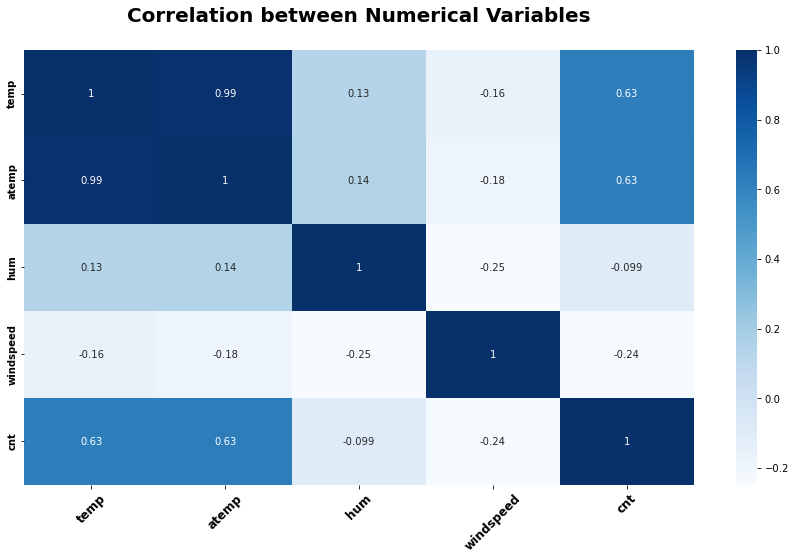

In [34]:
plt.figure(figsize=(15,8))

sns.heatmap(bikeshare_numericalvars_corr,cmap='Blues',annot=True)
plt.xticks(rotation=45,fontsize=12,fontweight=600)
plt.yticks(fontweight=600)
plt.title('Correlation between Numerical Variables\n',fontdict={'fontsize': 20, 'fontweight' : 700})

plt.show()

### Observation:
- Clearly we can see that temp and atemp are highly correlated to each other and both are having same correlation value with cnt (target) variable.
- We can drop one of the variable later during Linear Regression model building based on Recursive Feature Elimination (RFE) and Variance Inflation Factor (VIF).

# <font color='Chocolate'>7. Data Preparation for Linear Regression Model</font>

Before building linear regression model, we first need to convert all the levels present in the categorical values to the integer values which we call it as dummy variables.

## Create Dummy Variables for all the Categorical Variables

In [35]:
# Create dummy variables for season variable and concatenate to bike sharing dataset
season_df = pd.get_dummies(bikesharing_data['season'],drop_first=True)
bikesharing_data = pd.concat([bikesharing_data,season_df],axis=1)

In [36]:
# Create dummy variables for month(mnth) variable and concatenate to bike sharing dataset
month_df = pd.get_dummies(bikesharing_data['mnth'],drop_first=True)
bikesharing_data = pd.concat([bikesharing_data,month_df],axis=1)

In [37]:
# Create dummy variables for weekday variable and concatenate to bike sharing dataset
weekday_df = pd.get_dummies(bikesharing_data['weekday'],drop_first=True)
bikesharing_data = pd.concat([bikesharing_data,weekday_df],axis=1)

In [38]:
# Create dummy variables for weather variable and concatenate to bike sharing dataset
# We are not going to drop first column as we already shortage of one level in the main dataset (Heavy_Rain) and we don't want to lose explaining this feature
weather_df = pd.get_dummies(bikesharing_data['weathersit'])
bikesharing_data = pd.concat([bikesharing_data,weather_df],axis=1)

**We have now created dummy variables and concatenated to bike share dataset. We no longer needed to have original categorical variables, so let's drop them from the dataset.**

In [39]:
bikesharing_data.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)

In [40]:
bikesharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
bikesharing_data.shape

(730, 31)

In [42]:
bikesharing_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

In [43]:
bikesharing_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**We have removed all the original categorical variables from the dataset which are no longer useful to us. Now let's start building the linear regression model.**

# <font color='Chocolate'>8. Build Linear Regression Model</font>

## <font color='Chocolate'>8.1 Splitting the data into Training and Testing Sets</font>

In [44]:
# We pass random_state inside train_test_split function so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikeshare_train, bikeshare_test = train_test_split(bikesharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
bikeshare_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [46]:
bikeshare_train.shape

(510, 31)

In [47]:
bikeshare_train.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   Spring      510 non-null    uint8  
 9   Summer      510 non-null    uint8  
 10  Winter      510 non-null    uint8  
 11  August      510 non-null    uint8  
 12  December    510 non-null    uint8  
 13  February    510 non-null    uint8  
 14  January     510 non-null    uint8  
 15  July        510 non-null    uint8  
 16  June        510 non-null    uint8  
 17  March       510 non-null    uint8  
 18  May         510 non-null    uint8  
 19  November    510 non-null    

In [48]:
bikeshare_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
bikeshare_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [50]:
bikeshare_test.shape

(219, 31)

In [51]:
bikeshare_test.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    int64  
 8   Spring      219 non-null    uint8  
 9   Summer      219 non-null    uint8  
 10  Winter      219 non-null    uint8  
 11  August      219 non-null    uint8  
 12  December    219 non-null    uint8  
 13  February    219 non-null    uint8  
 14  January     219 non-null    uint8  
 15  July        219 non-null    uint8  
 16  June        219 non-null    uint8  
 17  March       219 non-null    uint8  
 18  May         219 non-null    uint8  
 19  November    219 non-null    

In [52]:
bikeshare_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='Chocolate'>8.2 Rescale Training Set - MinMax Scaler</font>

In [53]:
scaler = MinMaxScaler()

In [54]:
# Apply MinMaxScaler to all the continuous numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeshare_train[numerical_vars] = scaler.fit_transform(bikeshare_train[numerical_vars])

In [55]:
bikeshare_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [56]:
bikeshare_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='Chocolate'>8.3 Building Model from Training Set</font>

## Dividing the training set into X and Y sets

In [57]:
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

In [58]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [59]:
X_train.shape

(510, 30)

## Selecting significant Independent Variables using RFE

- **We have 30 independent variables available in train set. Analyzing all the variables will be difficult.**
- **So, we use Recursive Feature Elimination (RFE) utility (from sklearn) to select top 15 independent variables that are significant for the prediction in an automated fashion.**
- **Later we eliminate the variables one by one manually based on P-Value and Variance Inflation Factor (VIF).**
- **Cut-off values : P-Value < 0.05 and VIF < 5.**

In [60]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 11),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 15),
 ('March', False, 16),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Clear', True, 1),
 ('Light_Rain', True, 1),
 ('Mist', True, 1)]

In [62]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'January', 'July', 'November', 'September', 'Clear',
       'Light_Rain', 'Mist'],
      dtype='object')

## Model Build - 1

In [63]:
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)
lr_model1 = sm.OLS(y_train, X_train_sm).fit()

lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.25e-189
Time:                        11:48:21   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.029      5.273      0.000       0.096       0.210
yr             0.2301      0.008     28.386      0.000       0.214       0.246
holiday       -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp           0.5052      0.035     14.369      0.000       0.436       0.574
hum           -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed     -0.1854      0.026     -7.179      0.000      -0.236      -0.135
Spring        -0.0564      0.021     -2.664      0.008      -0.098      -0.015
Summer         0.0466      0.015      3.080      0.002       0.017       0.076
Winter         0.0986      0.018      5.519      0.000       0.064       0.134
January       -0.0339      0.018     -1.929      0.054      -0.068       0.001
July          -0.0562      0.018     -3.076      0.002      -0.092      -0.020
November      -0.0253      0.017     -1.463      0.144      -0.059       0.009
September      0.0798      0.017      4.755      0.000       0.047       0.113
Clear          0.1498      0.011     14.230      0.000       0.129       0.170
Light_Rain    -0.0920      0.022     -4.157      0.000      -0.135      -0.049
Mist           0.0955      0.013      7.636      0.000       0.071       0.120
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                     9.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF Check: Model Build - 1

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Clear,49.16
14,Mist,32.33
5,Spring,5.20
13,Light_Rain,4.16
2,temp,3.97
7,Winter,3.77
6,Summer,2.67
3,hum,1.91
8,January,1.57
9,July,1.49


### Observation:
- In Model Build - 1, we can see high P-Value for November variable (0.144). So, we proceed to drop this variable.

## Model Build - 2

In [65]:
cols = cols.drop('November')
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)
lr_model2 = sm.OLS(y_train, X_train_sm).fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.45e-190
Time:                        11:48:21   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1481      0.029      5.128      0.000       0.091       0.205
yr             0.2301      0.008     28.348      0.000       0.214       0.246
holiday       -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp           0.5127      0.035     14.720      0.000       0.444       0.581
hum           -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed     -0.1871      0.026     -7.243      0.000      -0.238      -0.136
Spring        -0.0518      0.021     -2.472      0.014      -0.093      -0.011
Summer         0.0491      0.015      3.259      0.001       0.019       0.079
Winter         0.0931      0.017      5.324      0.000       0.059       0.127
January       -0.0331      0.018     -1.881      0.061      -0.068       0.001
July          -0.0559      0.018     -3.056      0.002      -0.092      -0.020
September      0.0825      0.017      4.940      0.000       0.050       0.115
Clear          0.1476      0.010     14.150      0.000       0.127       0.168
Light_Rain    -0.0929      0.022     -4.197      0.000      -0.136      -0.049
Mist           0.0935      0.012      7.513      0.000       0.069       0.118
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF Check: Model Build - 2

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Clear,48.17
13,Mist,31.81
5,Spring,5.08
12,Light_Rain,4.13
2,temp,3.89
7,Winter,3.60
6,Summer,2.64
3,hum,1.91
8,January,1.57
9,July,1.49


### Observation:
- In Model Build - 2, we can see high P-Value for January variable (0.061). So, we proceed to drop this variable.

## Model Build - 3

In [67]:
cols = cols.drop('January')
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)
lr_model3 = sm.OLS(y_train, X_train_sm).fit()

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.69e-190
Time:                        11:48:21   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1400      0.029      4.889      0.000       0.084       0.196
yr             0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
Spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
Summer         0.0519      0.015      3.457      0.001       0.022       0.081
Winter         0.0987      0.017      5.719      0.000       0.065       0.133
July          -0.0575      0.018     -3.140      0.002      -0.094      -0.022
September      0.0830      0.017      4.962      0.000       0.050       0.116
Clear          0.1441      0.010     14.002      0.000       0.124       0.164
Light_Rain    -0.0941      0.022     -4.241      0.000      -0.138      -0.051
Mist           0.0900      0.012      7.295      0.000       0.066       0.114
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                     1.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.27e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF Check: Model Build - 3

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Clear,46.67
12,Mist,30.98
5,Spring,5.02
11,Light_Rain,4.09
2,temp,3.61
7,Winter,3.49
6,Summer,2.61
3,hum,1.90
8,July,1.48
9,September,1.30


### Observation:
- In Model Build - 3, we can see that we have Infinite VIF for Clear and Mist attributes. Let's drop Clear variable and observe the new model.

## Model Build - 4

In [69]:
cols = cols.drop('Clear')
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)
lr_model4 = sm.OLS(y_train, X_train_sm).fit()

lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.69e-190
Time:                        11:48:21   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.000       0.216       0.352
yr             0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
Spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
Summer         0.0519      0.015      3.457      0.001       0.022       0.081
Winter         0.0987      0.017      5.719      0.000       0.065       0.133
July          -0.0575      0.018     -3.140      0.002      -0.094      -0.022
September      0.0830      0.017      4.962      0.000       0.050       0.116
Light_Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check: Model Build - 4

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.35
6,Summer,2.78
11,Mist,2.28
0,yr,2.08
8,July,1.58
9,September,1.38


### Observation:
- All the variables having P-Value within the significant value.
- For hum variable we have VIF value as 28.06 which is very high. Let's drop this variable.

## Model Build - 5

In [71]:
cols = cols.drop('hum')
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)
lr_model5 = sm.OLS(y_train, X_train_sm).fit()

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.40e-187
Time:                        11:48:22   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
yr             0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
Spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
Summer         0.0453      0.015      2.971      0.003       0.015       0.075
Winter         0.0831      0.017      4.818      0.000       0.049       0.117
July          -0.0524      0.019     -2.811      0.005      -0.089      -0.016
September      0.0767      0.017      4.511      0.000       0.043       0.110
Light_Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check: Model Build - 5

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,yr,2.07
6,Winter,1.79
7,July,1.58
10,Mist,1.55
8,September,1.34
9,Light_Rain,1.08


### Observation:
- Although we have VIF as 5.09 (>5) for temp variable it is the important variable for our prediction as we saw (in data visualization) that it is highly correlated with cnt (target) variable.

## <font color='Chocolate'>8.4 Predict Train Set Using Model Build - 5</font>

Model Build - 5 looks like a good model for prediction which has R-Squared value as 0.836 (83.6% accurate). Let us predict the values from Train set and compare with actual data.

In [73]:
lr_model5.params

const         0.199648
yr            0.233482
holiday      -0.098013
temp          0.491508
windspeed    -0.147977
Spring       -0.066942
Summer        0.045280
Winter        0.083084
July         -0.052418
September     0.076686
Light_Rain   -0.285155
Mist         -0.081558
dtype: float64

In [74]:
X_train_sm.head()

,const,yr,holiday,temp,windspeed,Spring,Summer,Winter,July,September,Light_Rain,Mist
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,1


In [75]:
y_train_pred = lr_model5.predict(X_train_sm)

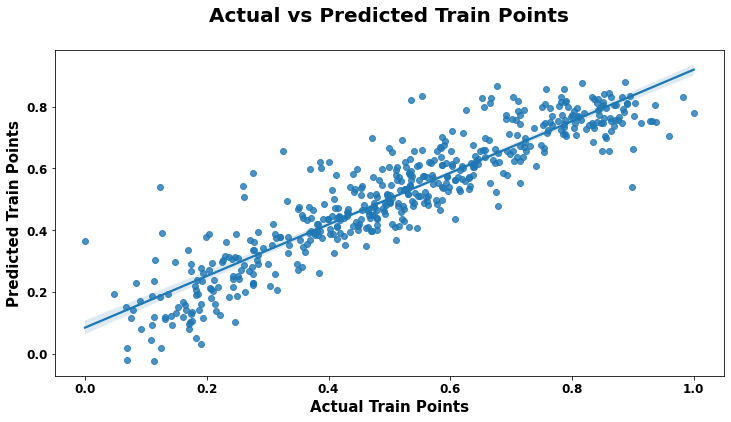

In [76]:
plt.figure(figsize=(12,6))

sns.regplot(x=y_train,y=y_train_pred)
#Title
plt.title('Actual vs Predicted Train Points\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Actual Train Points', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Predicted Train Points", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- We can see that residuals are equally distributed across predicted values in train set. Therefore we don't see any high deviation between actual and predicted points.

## <font color='Chocolate'>8.5 Residual Analysis on Train set</font>

Let us perform Residual Analysis for this model in training set and observe the normal distribution for error terms.

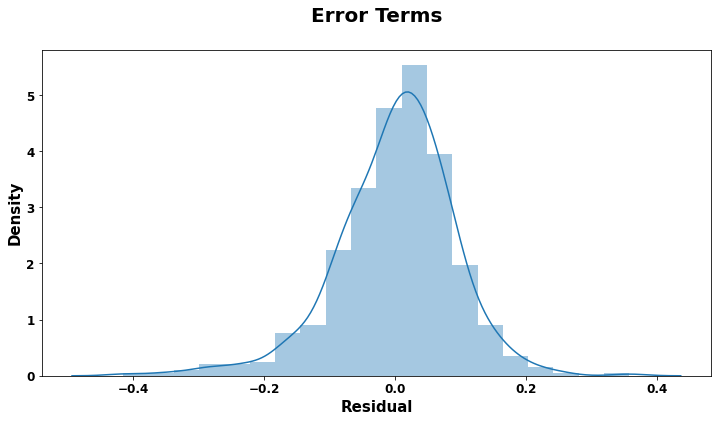

In [77]:
plt.figure(figsize=(12,6))

sns.distplot((y_train - y_train_pred),bins=20)
# Title
plt.title('Error Terms\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Residual', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Density', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

### Observation:
- From the above plot we can say that error Is Normallly Distributed with mean 0 in train set, which indicates that our model looks good.

## <font color='Chocolate'>8.6 Validate Homoscedasticity on Train set</font>

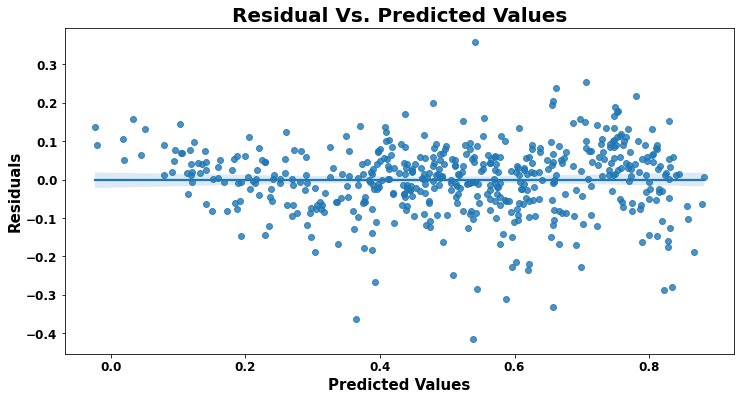

In [78]:
plt.figure(figsize=(12,6))

sns.regplot(x=y_train_pred, y=(y_train-y_train_pred))
# Title
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Predicted Values', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Residuals', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

### Observation:
- From the above plot, we can say that the cluster of points have same width all across and of same variance. Hence it is Homoscedasticity.

## <font color='Chocolate'>8.7 Make Prediction on Test Set</font>

In [79]:
numerical_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [80]:
bikeshare_test[numerical_vars].head()

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968


## Rescale Test Set - MinMax Scaler

In [81]:
bikeshare_test[numerical_vars] = scaler.transform(bikeshare_test[numerical_vars])

In [82]:
bikeshare_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [83]:
bikeshare_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light_Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Divide the test set into X and Y

In [84]:
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

In [85]:
X_test.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   Spring      219 non-null    uint8  
 8   Summer      219 non-null    uint8  
 9   Winter      219 non-null    uint8  
 10  August      219 non-null    uint8  
 11  December    219 non-null    uint8  
 12  February    219 non-null    uint8  
 13  January     219 non-null    uint8  
 14  July        219 non-null    uint8  
 15  June        219 non-null    uint8  
 16  March       219 non-null    uint8  
 17  May         219 non-null    uint8  
 18  November    219 non-null    uint8  
 19  October     219 non-null    

## Preserving only required features in Test set (X_test)

Here we consider only the required features which are identified during model training (Model Build - 5) and ignore rest other features.

In [86]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [87]:
X_test_new.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   Spring      219 non-null    uint8  
 6   Summer      219 non-null    uint8  
 7   Winter      219 non-null    uint8  
 8   July        219 non-null    uint8  
 9   September   219 non-null    uint8  
 10  Light_Rain  219 non-null    uint8  
 11  Mist        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


## Predict Test data using Model Build - 5

Let us predict test data using Model Build - 5 and compare the results with actual data.

In [88]:
y_test_pred = lr_model5.predict(X_test_new)

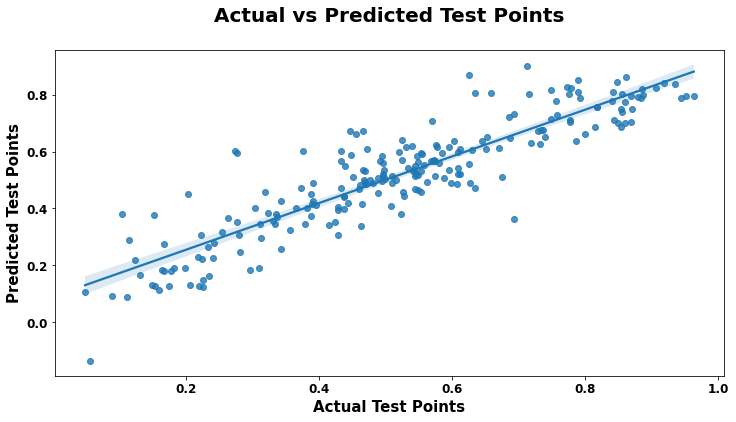

In [89]:
plt.figure(figsize=(12,6))

sns.regplot(x=y_test,y=y_test_pred)
#Title
plt.title('Actual vs Predicted Test Points\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Predicted Test Points", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

### Observation:
- We can see that residuals are equally distributed across predicted values in test set. Therefore we don't see any high deviation between actual and predicted points.

## <font color='Chocolate'>8.8 Residual Analysis on Test set</font>

Let us perform Residual Analysis for this model in test set and observe the normal distribution for error terms.

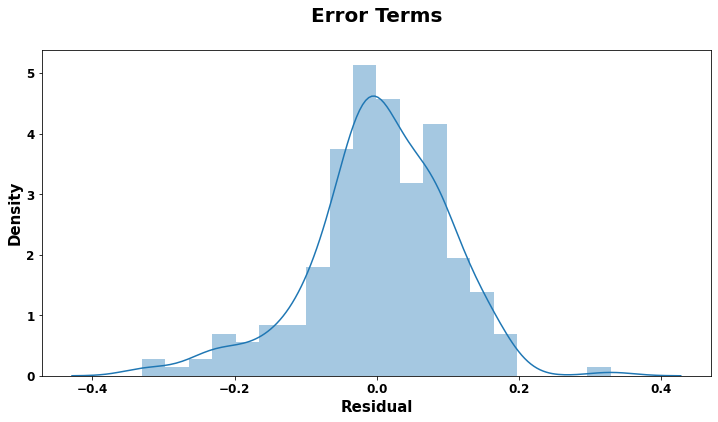

In [90]:
plt.figure(figsize=(12,6))

sns.distplot((y_test - y_test_pred),bins=20)
# Title
plt.title('Error Terms\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Residual', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Density', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

### Observation:
- From the above plot we can say that error Is Normallly Distributed with mean 0 in test set, which indicates that our model looks good.

# <font color='Chocolate'>9. Evaluate Linear Regression Model</font>

## <font color='Chocolate'>9.1 R-Squared between Train and Test data sets</font>

## R-Squared on Train Set

In [91]:
r2_score_train = r2_score(y_train, y_train_pred)
print(f'R-Squared for Train Set: {round(r2_score_train,3)}')

R-Squared for Train Set: 0.836


## R-Squared on Test Set

In [92]:
r2_score_test = r2_score(y_test, y_test_pred)
print(f'R-Squared for Test Set: {round(r2_score_test,3)}')

R-Squared for Test Set: 0.805


## <font color='Chocolate'>9.2 Adjusted R-Squared between Train and Test data sets</font>

## Adjusted R-Squared on Train Set

In [93]:
n = X_train_sm.shape[0]
p = X_train_sm.shape[1]
adj_r2_train = 1-(1-r2_score_train)*(n-1)/(n-p-1)
print(f'Adjusted R-Squared for Train Set: {round(adj_r2_train,3)}')

Adjusted R-Squared for Train Set: 0.832


## Adjusted R-Squared on Test Set

In [94]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]
adj_r2_test = 1-(1-r2_score_test)*(n-1)/(n-p-1)
print(f'Adjusted R-Squared for Test Set: {round(adj_r2_test,3)}')

Adjusted R-Squared for Test Set: 0.794


## <font color='Chocolate'>9.3 Mean Squared Error between Actual and Predicted Points</font>

## MSE on Train Set

In [95]:
mse_train = mean_squared_error(y_train,y_train_pred)
print(f'Mean Squared Error for Train Set: {round(mse_train,3)}')

Mean Squared Error for Train Set: 0.008


## MSE on Test Set

In [96]:
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'Mean Squared Error for Test Set: {round(mse_test,3)}')

Mean Squared Error for Test Set: 0.009


## <font color='Chocolate'>9.4 Evaluation Results</font>

Evaluation results of R-Squared, Adjusted R-Squared and Mean Squared Error for train and test sets are shown in the table below:

|Metric|Train Set|Test Set|
|:---|:---|:---|
|**R-Squared**|**0.836**|**0.805**|
|**Adj. R-Squared**|**0.832**|**0.794**|
|**Mean Squared Error**|**0.008**|**0.009**|

This model (Model Build - 5) looks decent and well **Generalized** for prediction.

# <font color='Chocolate'>10. Conclusion</font>
1. We can conclude that the final model built (Model Build - 5) has a very good predictive power which means that the model isn't fit by chance and well generalized for prediction.
2. From the data analysis we found that temp variable/feature has high correlation with cnt (target) variable. Also it has high coefficient as 0.491508 calculated from the model built which represents increase of 0.491508 units of bike ride count with increase of 1 unit in temperature.
3. Windspeed variable has a negative coefficient of -0.147977 calculated from the model. This represents the decrease of 0.147977 units in ride count with an increase of 1 unit in windspeed variable.

## Best fitted Linear Equation from the Model (Model Build - 5) is shown below:
<font size = 3 color='MidnightBlue'>**cnt(Target) = 0.199648 + (yr * 0.233482) - (holiday * 0.098013) + (temp * 0.491508) - (windspeed * 0.147977) - (Spring * 0.066942) + (Summer * 0.045280) + (Winter * 0.083084) - (July * 0.052418) + (September * 0.076686) - (Light_Rain * 0.285155) - (Mist * 0.081558)**</font>